# ECE143 Final Project

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question1

In [146]:
##################################################################################
################USE THE PROPROCESSED DATA TO SEPERATE OUT DEPARTMENTS#############
##################################################################################
combined_df = pd.read_csv("Preprocess_Completed.csv")
combined_df.set_index(["Department"], inplace=True)

total_Enolled = combined_df["Enroll"].sum()
total_eval = combined_df["Evals Made"].sum()
percent_evaluated = (total_eval/total_Enolled) * 100

#seperate the dataframes by department
ece_df = combined_df.loc["ECE"]
mae_df = combined_df.loc["MAE"]
beng_df = combined_df.loc["BENG"]
cse_df = combined_df.loc["CSE"]

#would be interesting to know - get the length of each df
ece_df_length = len(ece_df)
cse_df_length = len(cse_df)
beng_df_length = len(beng_df)
mae_df_length = len(mae_df)

#reset the index to all the dataframes
ece_df.reset_index(inplace=True)
cse_df.reset_index(inplace=True)
beng_df.reset_index(inplace=True)
mae_df.reset_index(inplace=True)

#add a new column to the dataframe indicating the ratio of students who evaluated the course percentage
ece_df["student ratio"] = (ece_df["Evals Made"]/ece_df["Enroll"]) *100
cse_df["student ratio"] = (cse_df["Evals Made"]/cse_df["Enroll"]) *100
mae_df["student ratio"] = (mae_df["Evals Made"]/mae_df["Enroll"]) *100
beng_df["student ratio"] = (beng_df["Evals Made"]/beng_df["Enroll"]) *100


#group all the epartments by the course so we have a group of all the unique courses in each department
ece_course_group = ece_df.groupby(["Course Number"])
mae_course_group = mae_df.groupby(["Course Number"])
cse_course_group = cse_df.groupby(["Course Number"])
beng_course_group = beng_df.groupby(["Course Number"])

#useful to record the number of unique courses available in the capes dataset for each department
number_of_unique_ece_courses = len(ece_course_group)
number_of_unique_cse_courses = len(cse_course_group)
number_of_unique_mae_courses = len(mae_course_group)
number_of_unique_beng_courses = len(beng_course_group)

#create 4 new dataframes to store info we are about to extract from the groups with the same columns as the original dfs
ece_courses_with_highest_evaluations_df = pd.DataFrame(columns = ece_df.columns)
cse_courses_with_highest_evaluations_df = pd.DataFrame(columns = cse_df.columns)
mae_courses_with_highest_evaluations_df = pd.DataFrame(columns = mae_df.columns)
beng_courses_with_highest_evaluations_df = pd.DataFrame(columns = beng_df.columns)


#for each group get the one unique course with the highest evaluation ratio
for ratio_val, unique_course in ece_course_group:
    highest_valued_ratio = unique_course.nlargest(1, "student ratio")
    ece_courses_with_highest_evaluations_df = ece_courses_with_highest_evaluations_df.append(highest_valued_ratio)

for ratio_val, unique_course in cse_course_group:
    highest_valued_ratio = unique_course.nlargest(1, "student ratio")
    cse_courses_with_highest_evaluations_df = cse_courses_with_highest_evaluations_df.append(highest_valued_ratio)

for ratio_val, unique_course in mae_course_group:
    highest_valued_ratio = unique_course.nlargest(1, "student ratio")
    mae_courses_with_highest_evaluations_df = mae_courses_with_highest_evaluations_df.append(highest_valued_ratio)

for ratio_val, unique_course in beng_course_group:
    highest_valued_ratio = unique_course.nlargest(1, "student ratio")
    beng_courses_with_highest_evaluations_df = beng_courses_with_highest_evaluations_df.append(highest_valued_ratio)

#get the length of the new constructed dataframes for a sanity check
ece_course_group_length = len(ece_courses_with_highest_evaluations_df)
cse_course_group_length = len(cse_courses_with_highest_evaluations_df)
mae_course_group_length = len(mae_courses_with_highest_evaluations_df)
beng_course_group_length = len(beng_courses_with_highest_evaluations_df)

#ALL PRINTS BELOW RETURNED TRUE, SANITY CHECK PASSED
# print(ece_course_group_length == number_of_unique_ece_courses)
# print(cse_course_group_length == number_of_unique_cse_courses)
# print(mae_course_group_length ==number_of_unique_mae_courses)
# print(beng_course_group_length == number_of_unique_beng_courses)

#for all the new unique course dataframes contructed convert grade received to a percentage and take the average of the 3 columns we chose to define "best" in quality
for i in ece_courses_with_highest_evaluations_df:
    grade_percentage = (ece_courses_with_highest_evaluations_df["Avg Grade Received"]/4.00) *100
    final_sum = ece_courses_with_highest_evaluations_df["Rcmnd Class"] + ece_courses_with_highest_evaluations_df["Rcmnd Instr"] + grade_percentage
    ece_courses_with_highest_evaluations_df["final sum"] = final_sum

for i in cse_courses_with_highest_evaluations_df:
    grade_percentage = (cse_courses_with_highest_evaluations_df["Avg Grade Received"]/4.00) *100
    final_sum = cse_courses_with_highest_evaluations_df["Rcmnd Class"] + cse_courses_with_highest_evaluations_df["Rcmnd Instr"] + grade_percentage
    cse_courses_with_highest_evaluations_df["final sum"] = final_sum

for i in mae_courses_with_highest_evaluations_df:
    grade_percentage = (mae_courses_with_highest_evaluations_df["Avg Grade Received"]/4.00) *100
    final_sum = mae_courses_with_highest_evaluations_df["Rcmnd Class"] + mae_courses_with_highest_evaluations_df["Rcmnd Instr"] + grade_percentage
    mae_courses_with_highest_evaluations_df["final sum"] = final_sum

for i in beng_courses_with_highest_evaluations_df:
    grade_percentage = (beng_courses_with_highest_evaluations_df["Avg Grade Received"]/4.00) *100
    final_sum = beng_courses_with_highest_evaluations_df["Rcmnd Class"] + beng_courses_with_highest_evaluations_df["Rcmnd Instr"] + grade_percentage
    beng_courses_with_highest_evaluations_df["final sum"] = final_sum


#sort the values in each unique dataframe based on the final sum column and extract the top courses in each department
ece_courses_with_highest_evaluations_df.sort_values("final sum", axis=0, ascending=False, inplace=True)
cse_courses_with_highest_evaluations_df.sort_values("final sum", axis=0, ascending=False, inplace=True)
mae_courses_with_highest_evaluations_df.sort_values("final sum", axis=0, ascending=False, inplace=True)
beng_courses_with_highest_evaluations_df.sort_values("final sum", axis=0, ascending=False, inplace=True)

C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


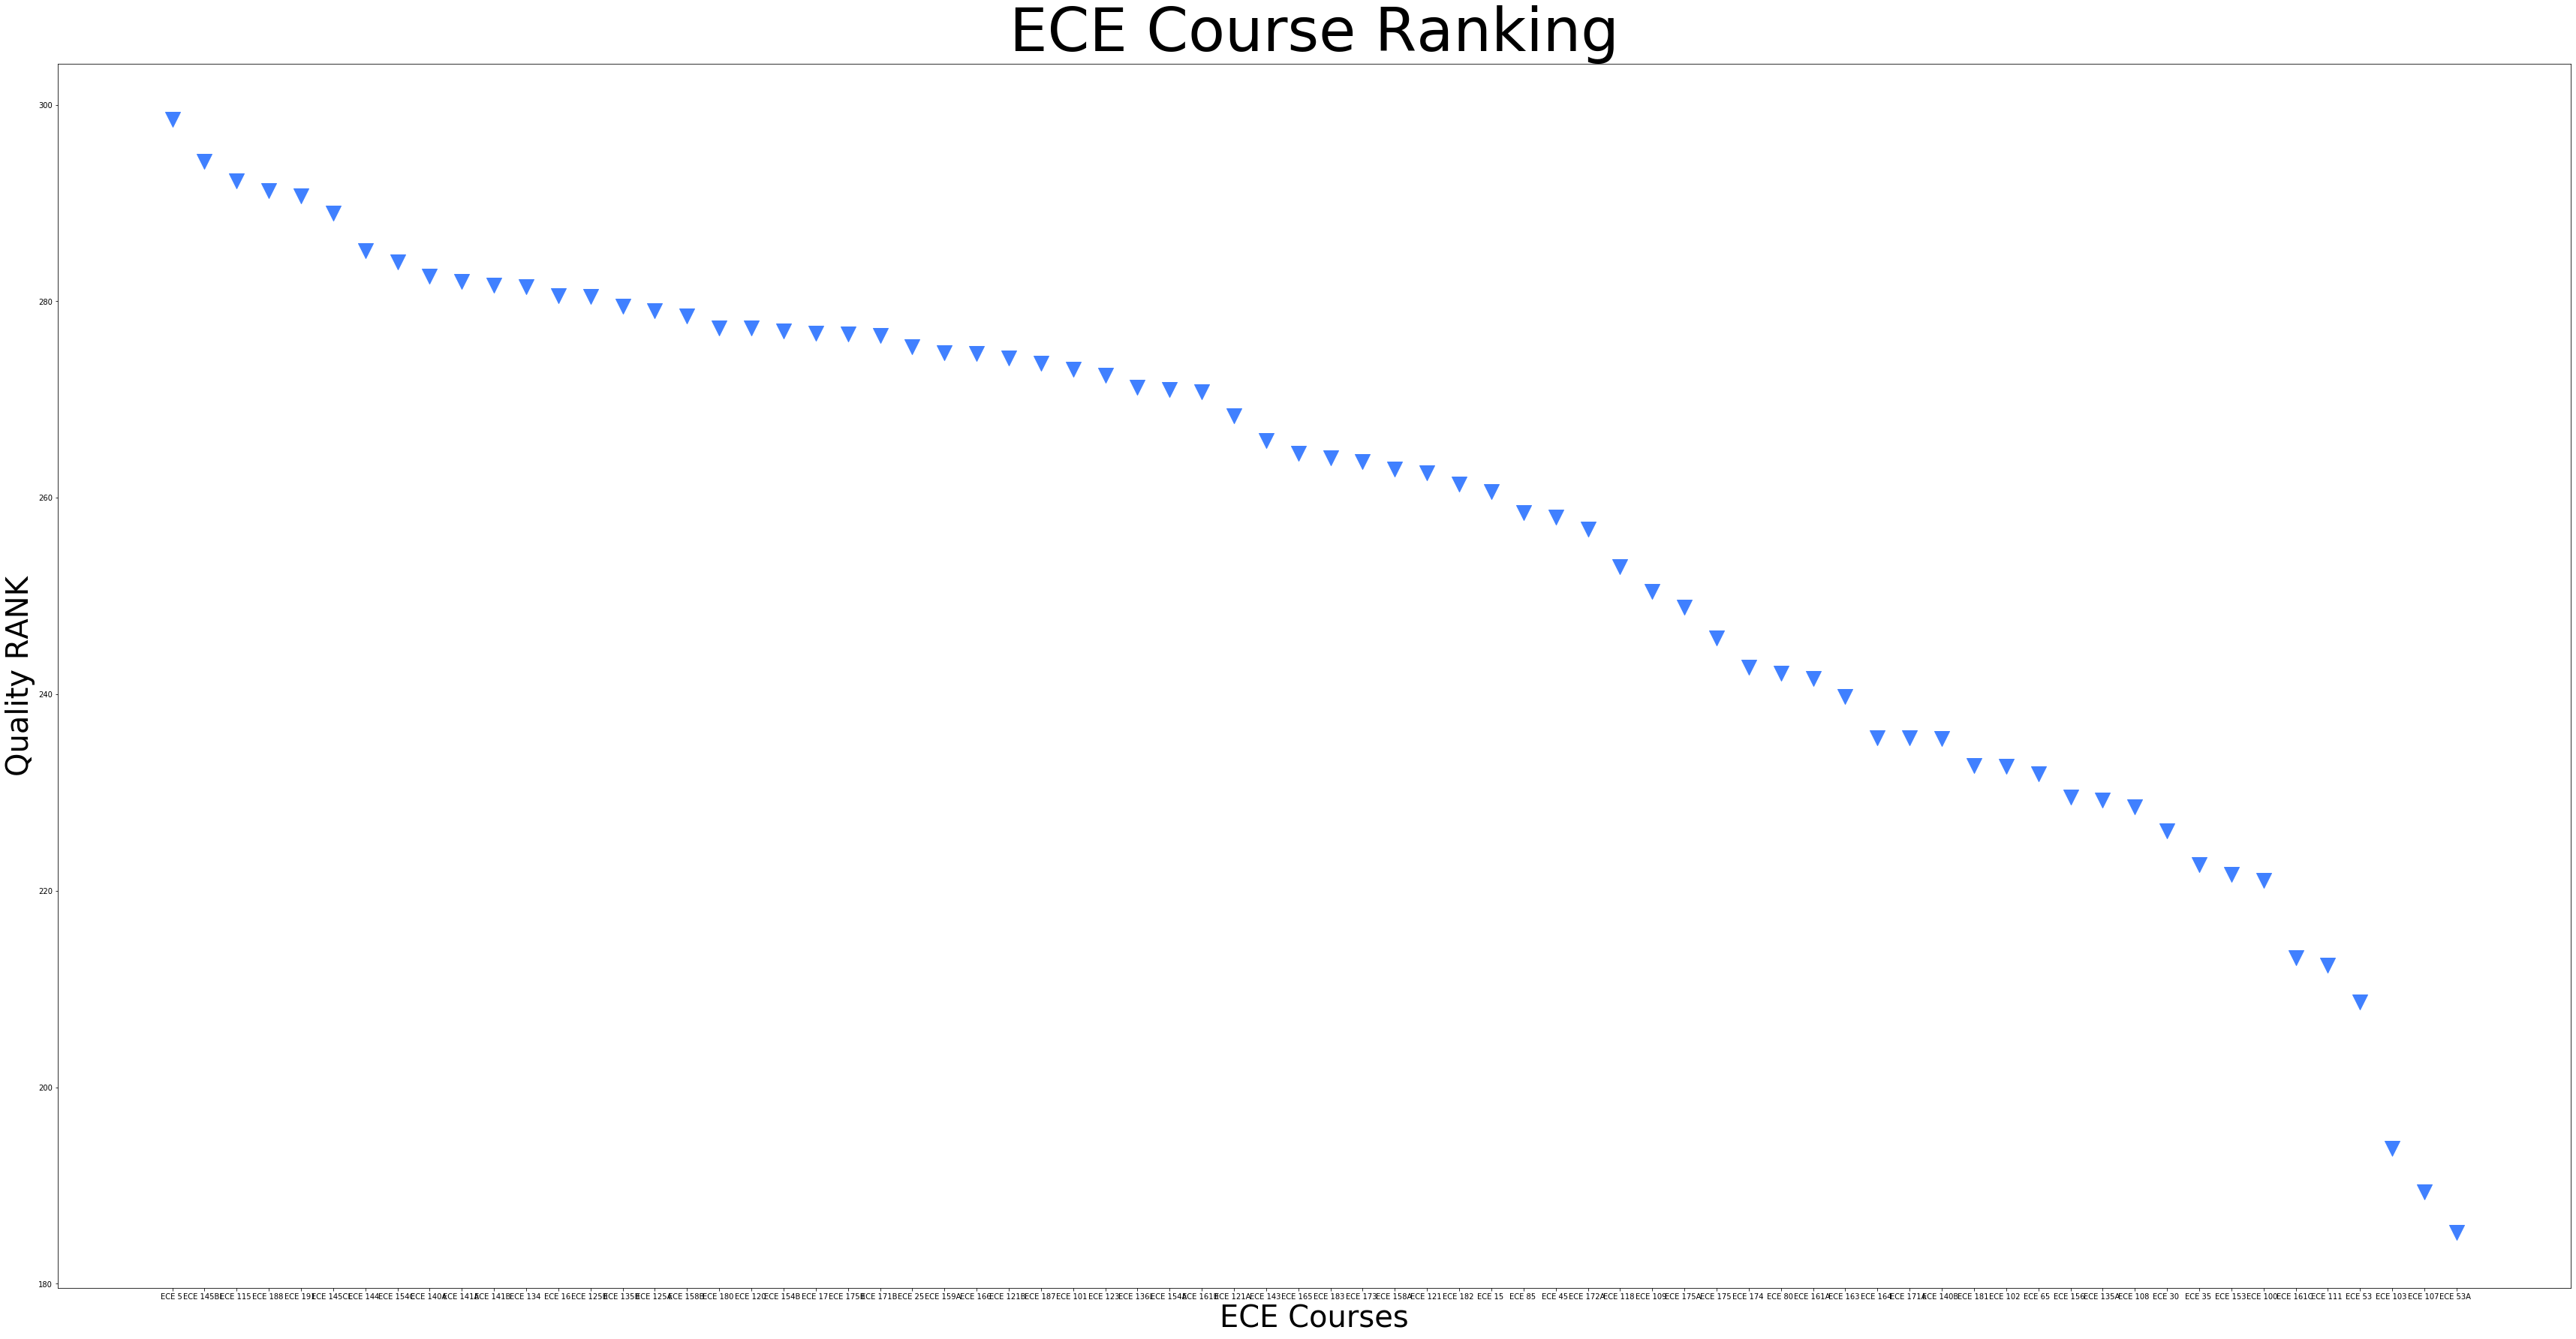

In [147]:
fig = plt.figure(figsize=(60, 30))
ece_x = fig.add_subplot(111)
ece_x = ece_courses_with_highest_evaluations_df["Course Number"]
ece_y = ece_courses_with_highest_evaluations_df["final sum"]
colors = (0.25,0.5,1)
plt.scatter(ece_x, ece_y, s=400, c=colors, marker = "v", alpha=1)
plt.autoscale(enable=True, axis='x', tight=False)
plt.title('ECE Course Ranking', fontsize=80)
plt.xlabel('ECE Courses', fontsize=40)
plt.ylabel('Quality RANK', fontsize=40)
plt.savefig('Question1_ECE.jpg')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


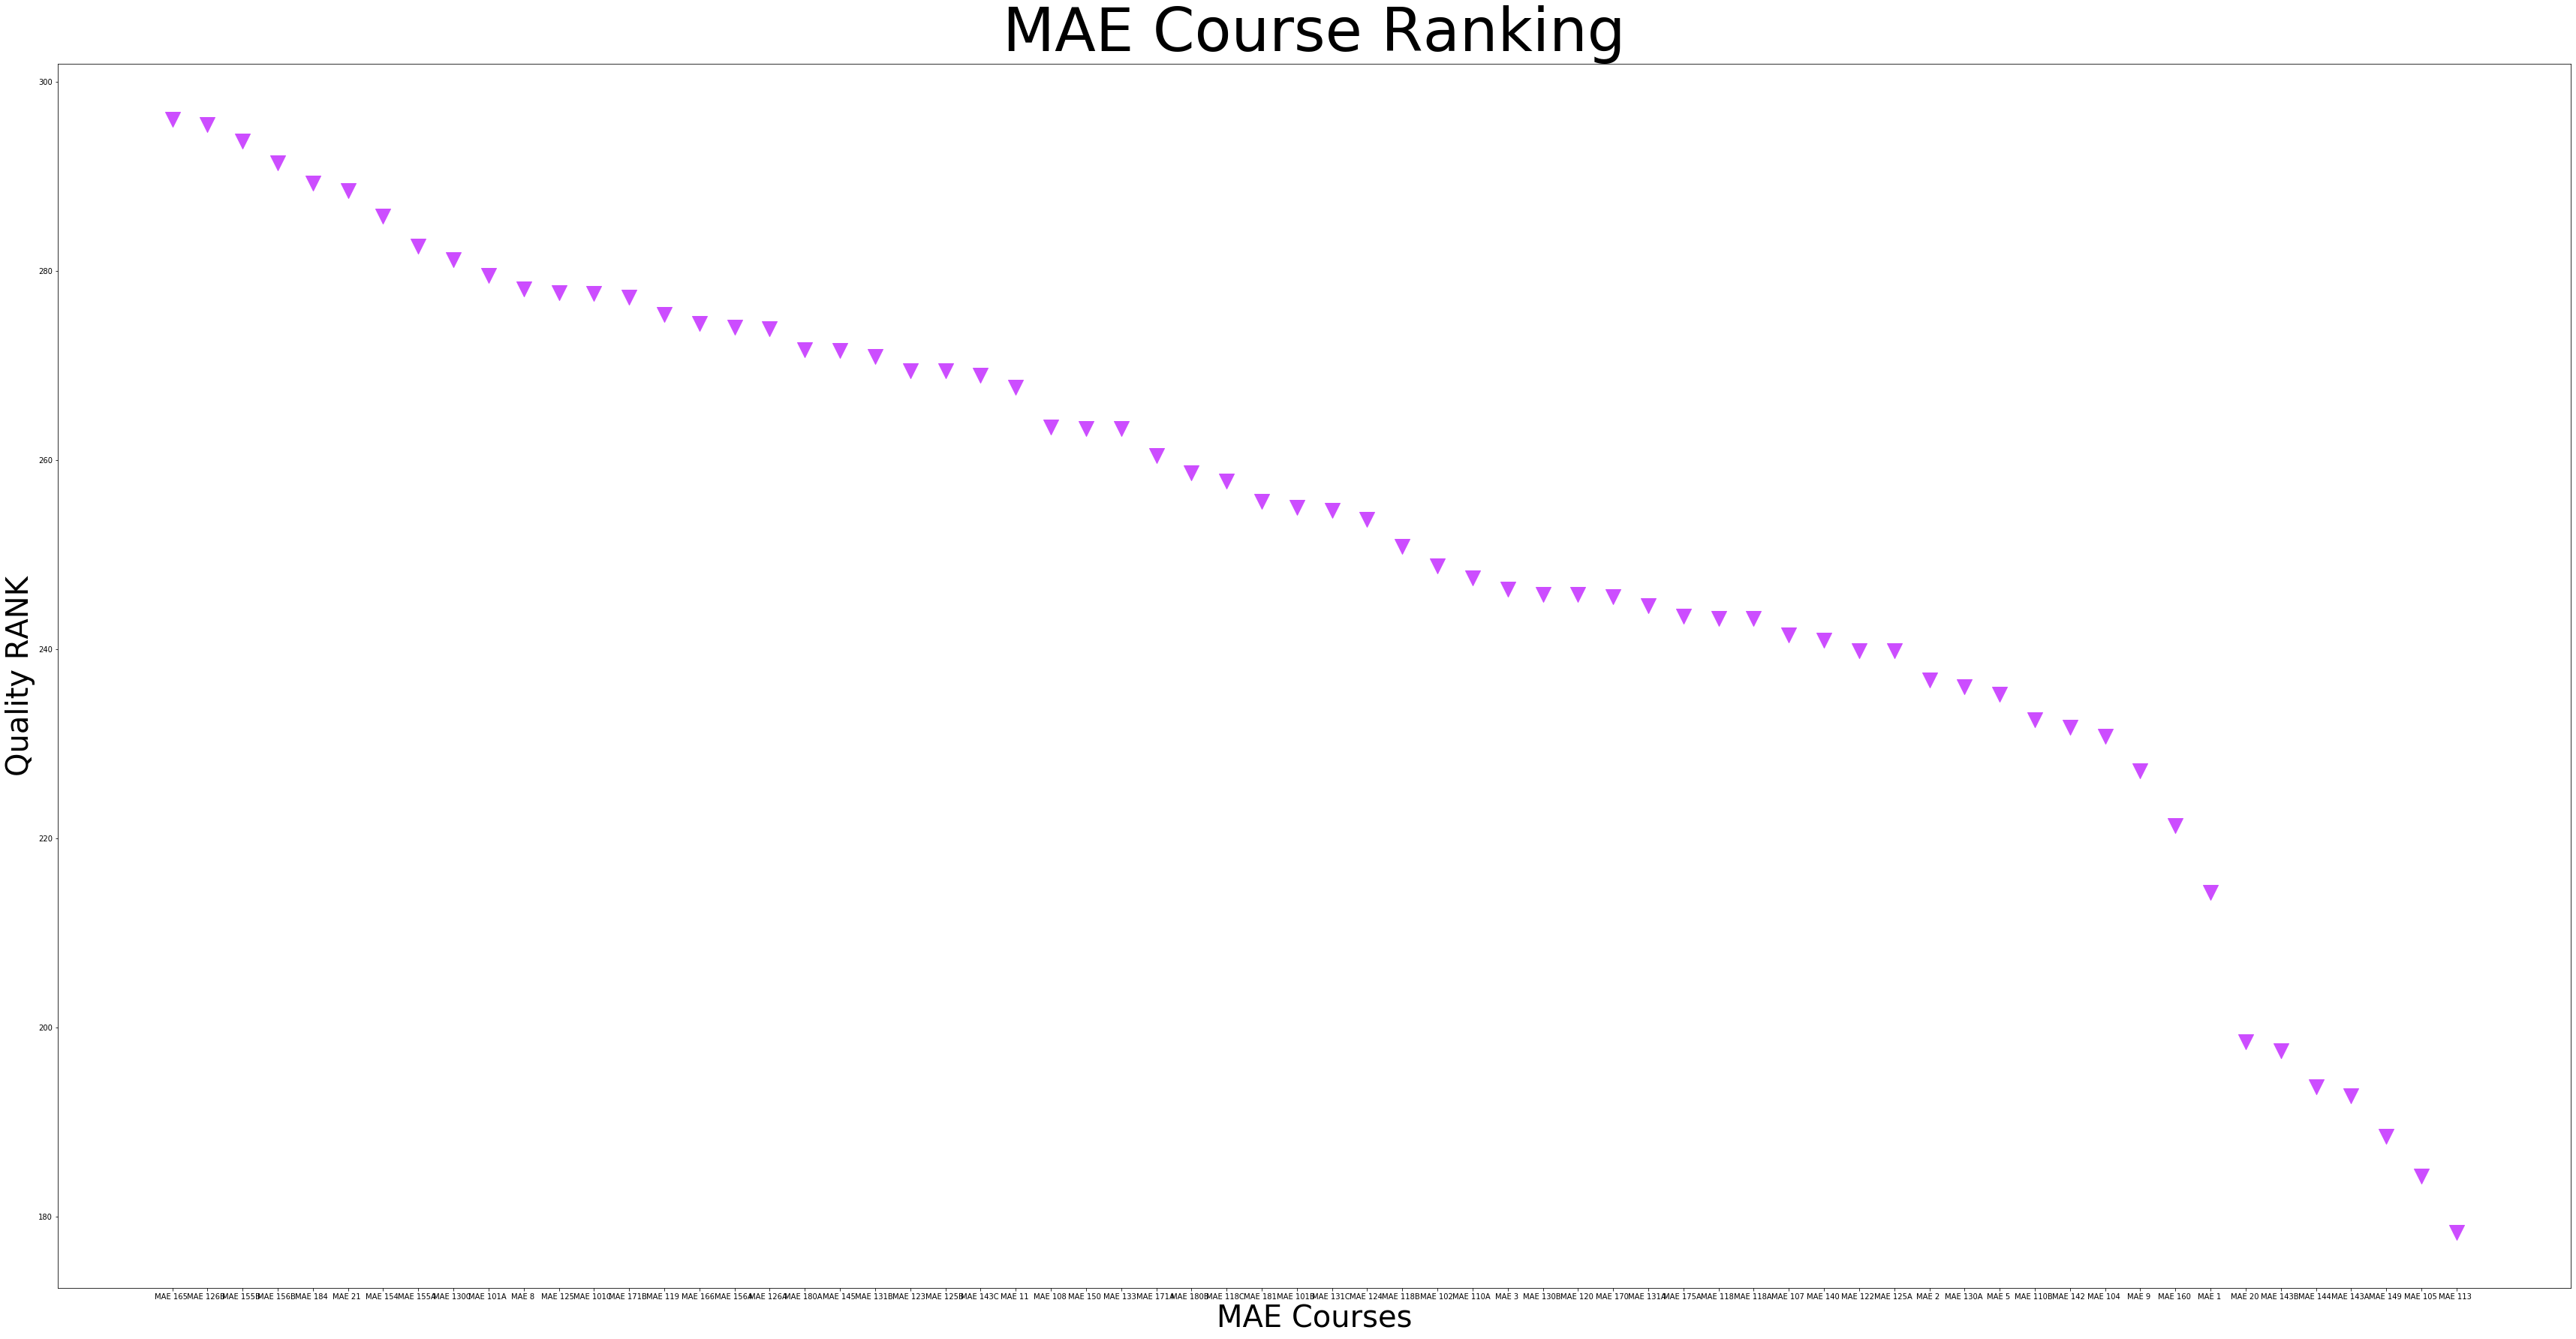

In [244]:
fig = plt.figure(figsize=(60, 30))
mae_x = fig.add_subplot(111)
mae_x = mae_courses_with_highest_evaluations_df["Course Number"]
mae_y = mae_courses_with_highest_evaluations_df["final sum"]
colors = (0.8,0.3,1)
plt.scatter(mae_x, mae_y, s=400, marker="v" ,c=colors, alpha=1)
plt.autoscale(enable=True, axis='x', tight=False)
plt.title('MAE Course Ranking', fontsize=80)
plt.xlabel('MAE Courses', fontsize=40)
plt.ylabel('Quality RANK', fontsize=40)
plt.savefig('Question1_MAE.jpg')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


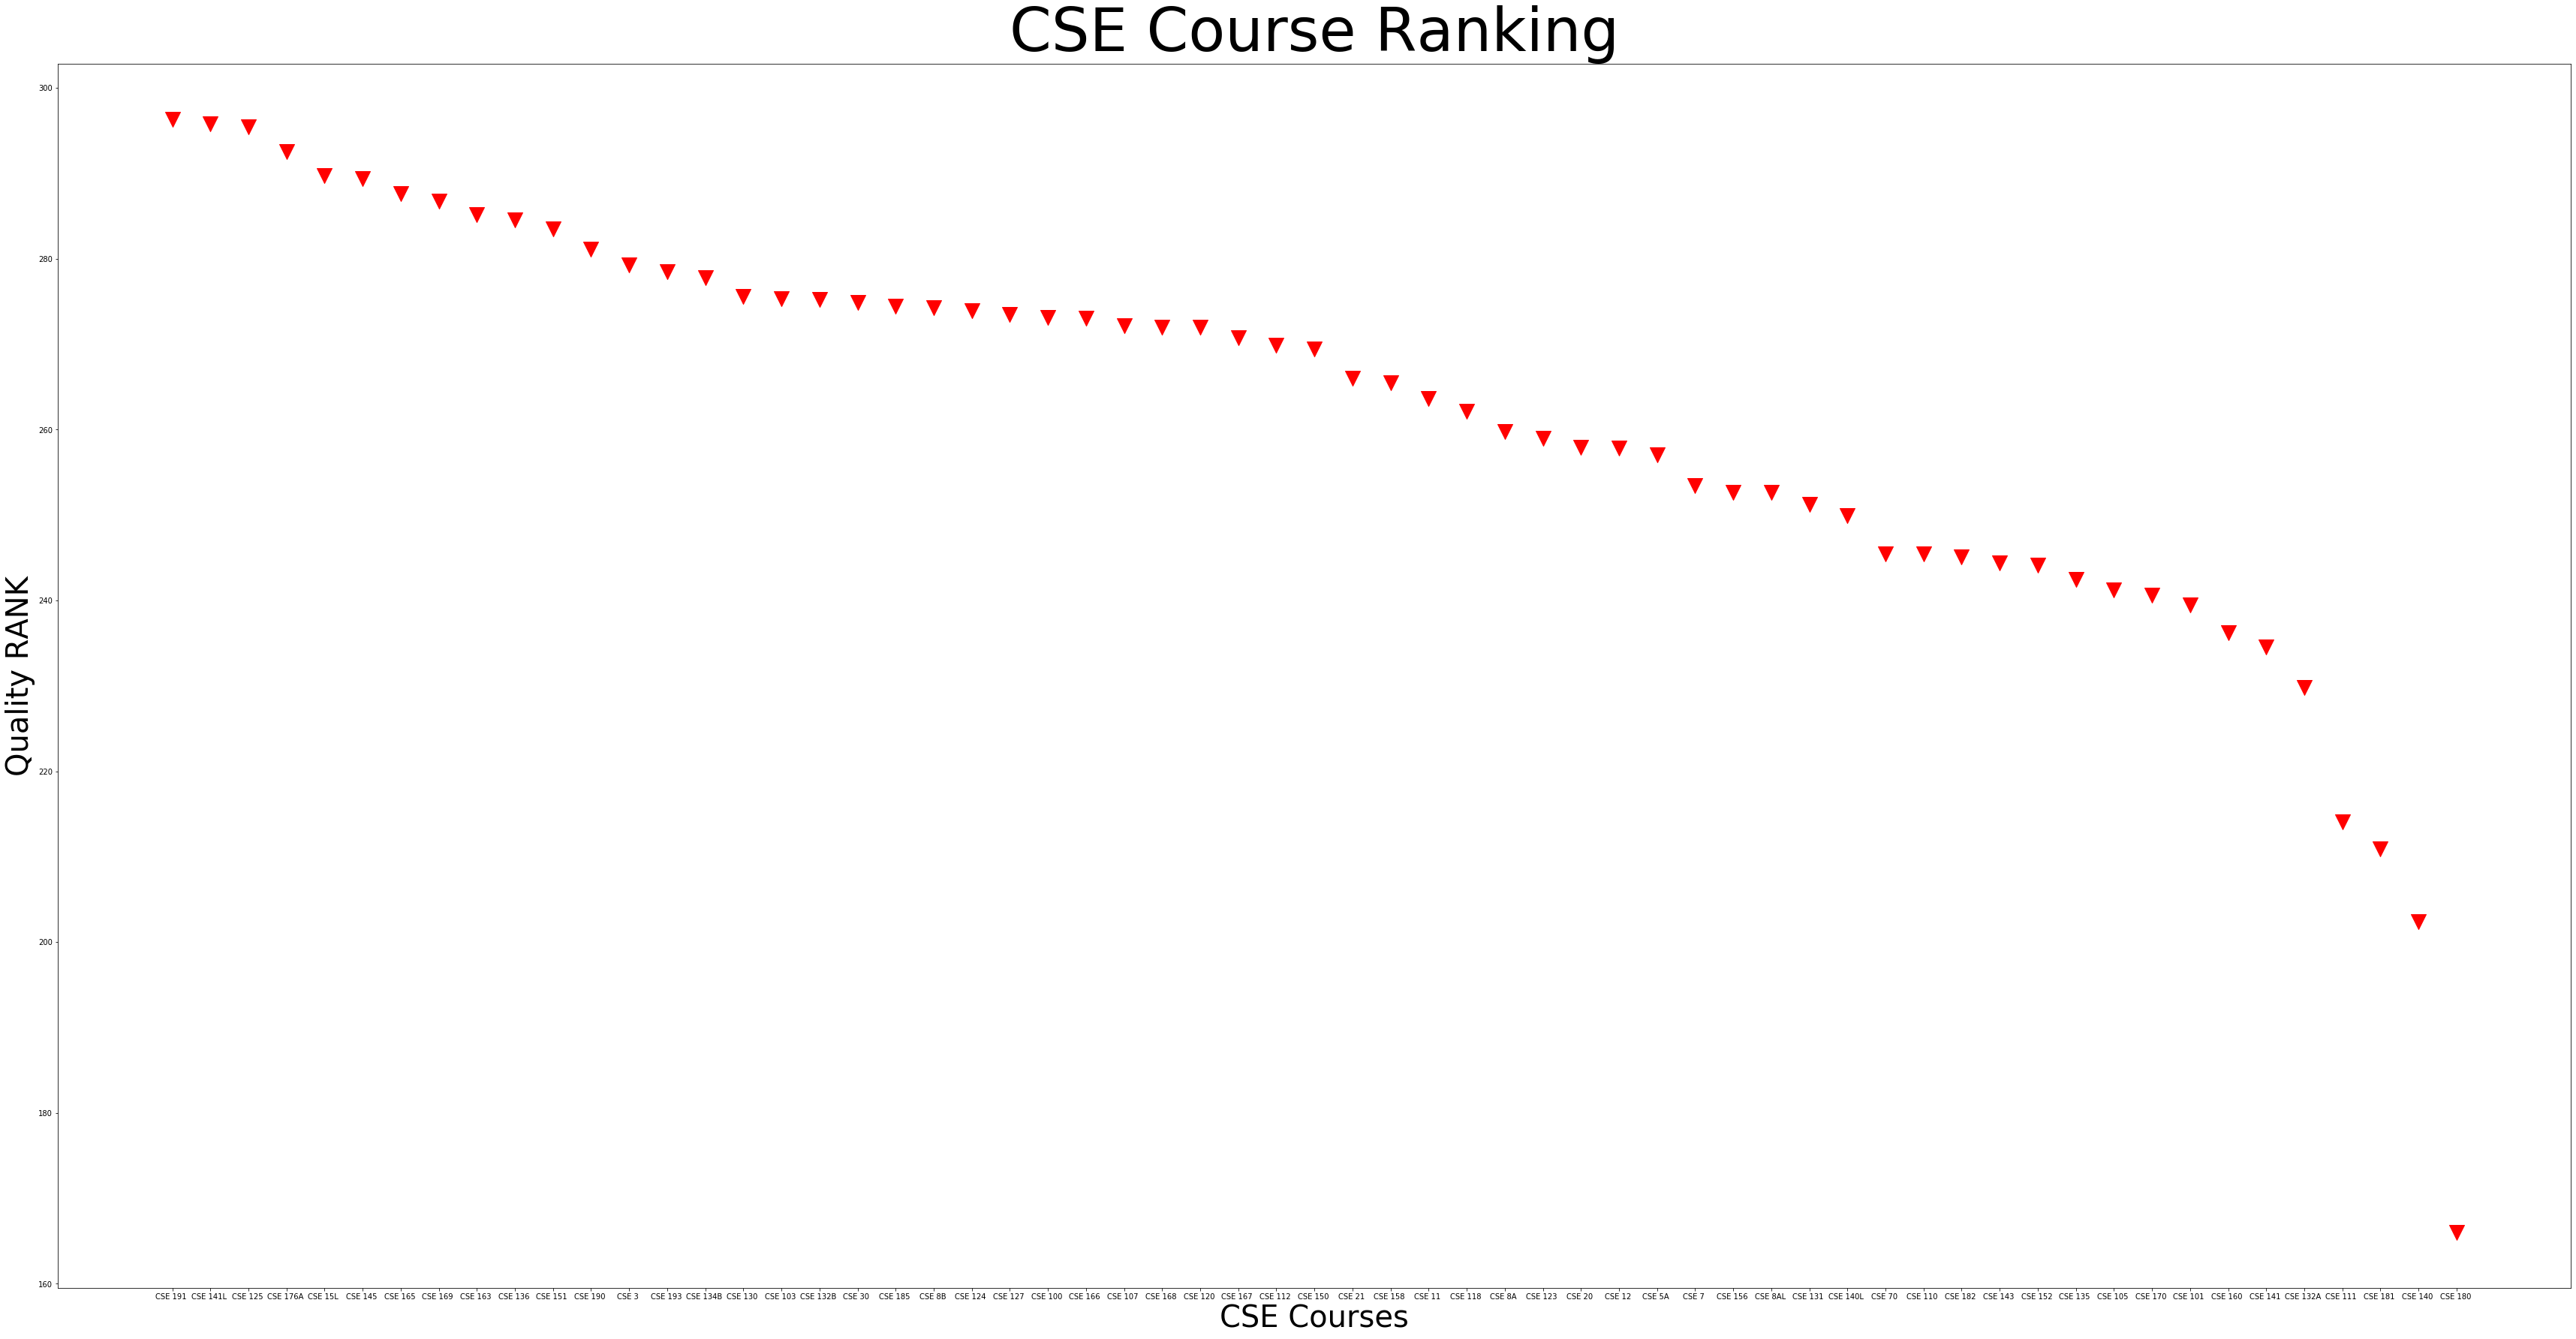

In [245]:
fig = plt.figure(figsize=(60, 30))
cse_x = fig.add_subplot(111)
cse_x = cse_courses_with_highest_evaluations_df["Course Number"]
cse_y = cse_courses_with_highest_evaluations_df["final sum"]
colors = (1,0,0)
plt.scatter(cse_x, cse_y, s=400, marker = "v", c=colors, alpha=1)
plt.autoscale(enable=True, axis='x', tight=False)
plt.title('CSE Course Ranking', fontsize=80)
plt.xlabel('CSE Courses', fontsize=40)
plt.ylabel('Quality RANK', fontsize=40)
plt.savefig('Question1_CSE.jpg')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


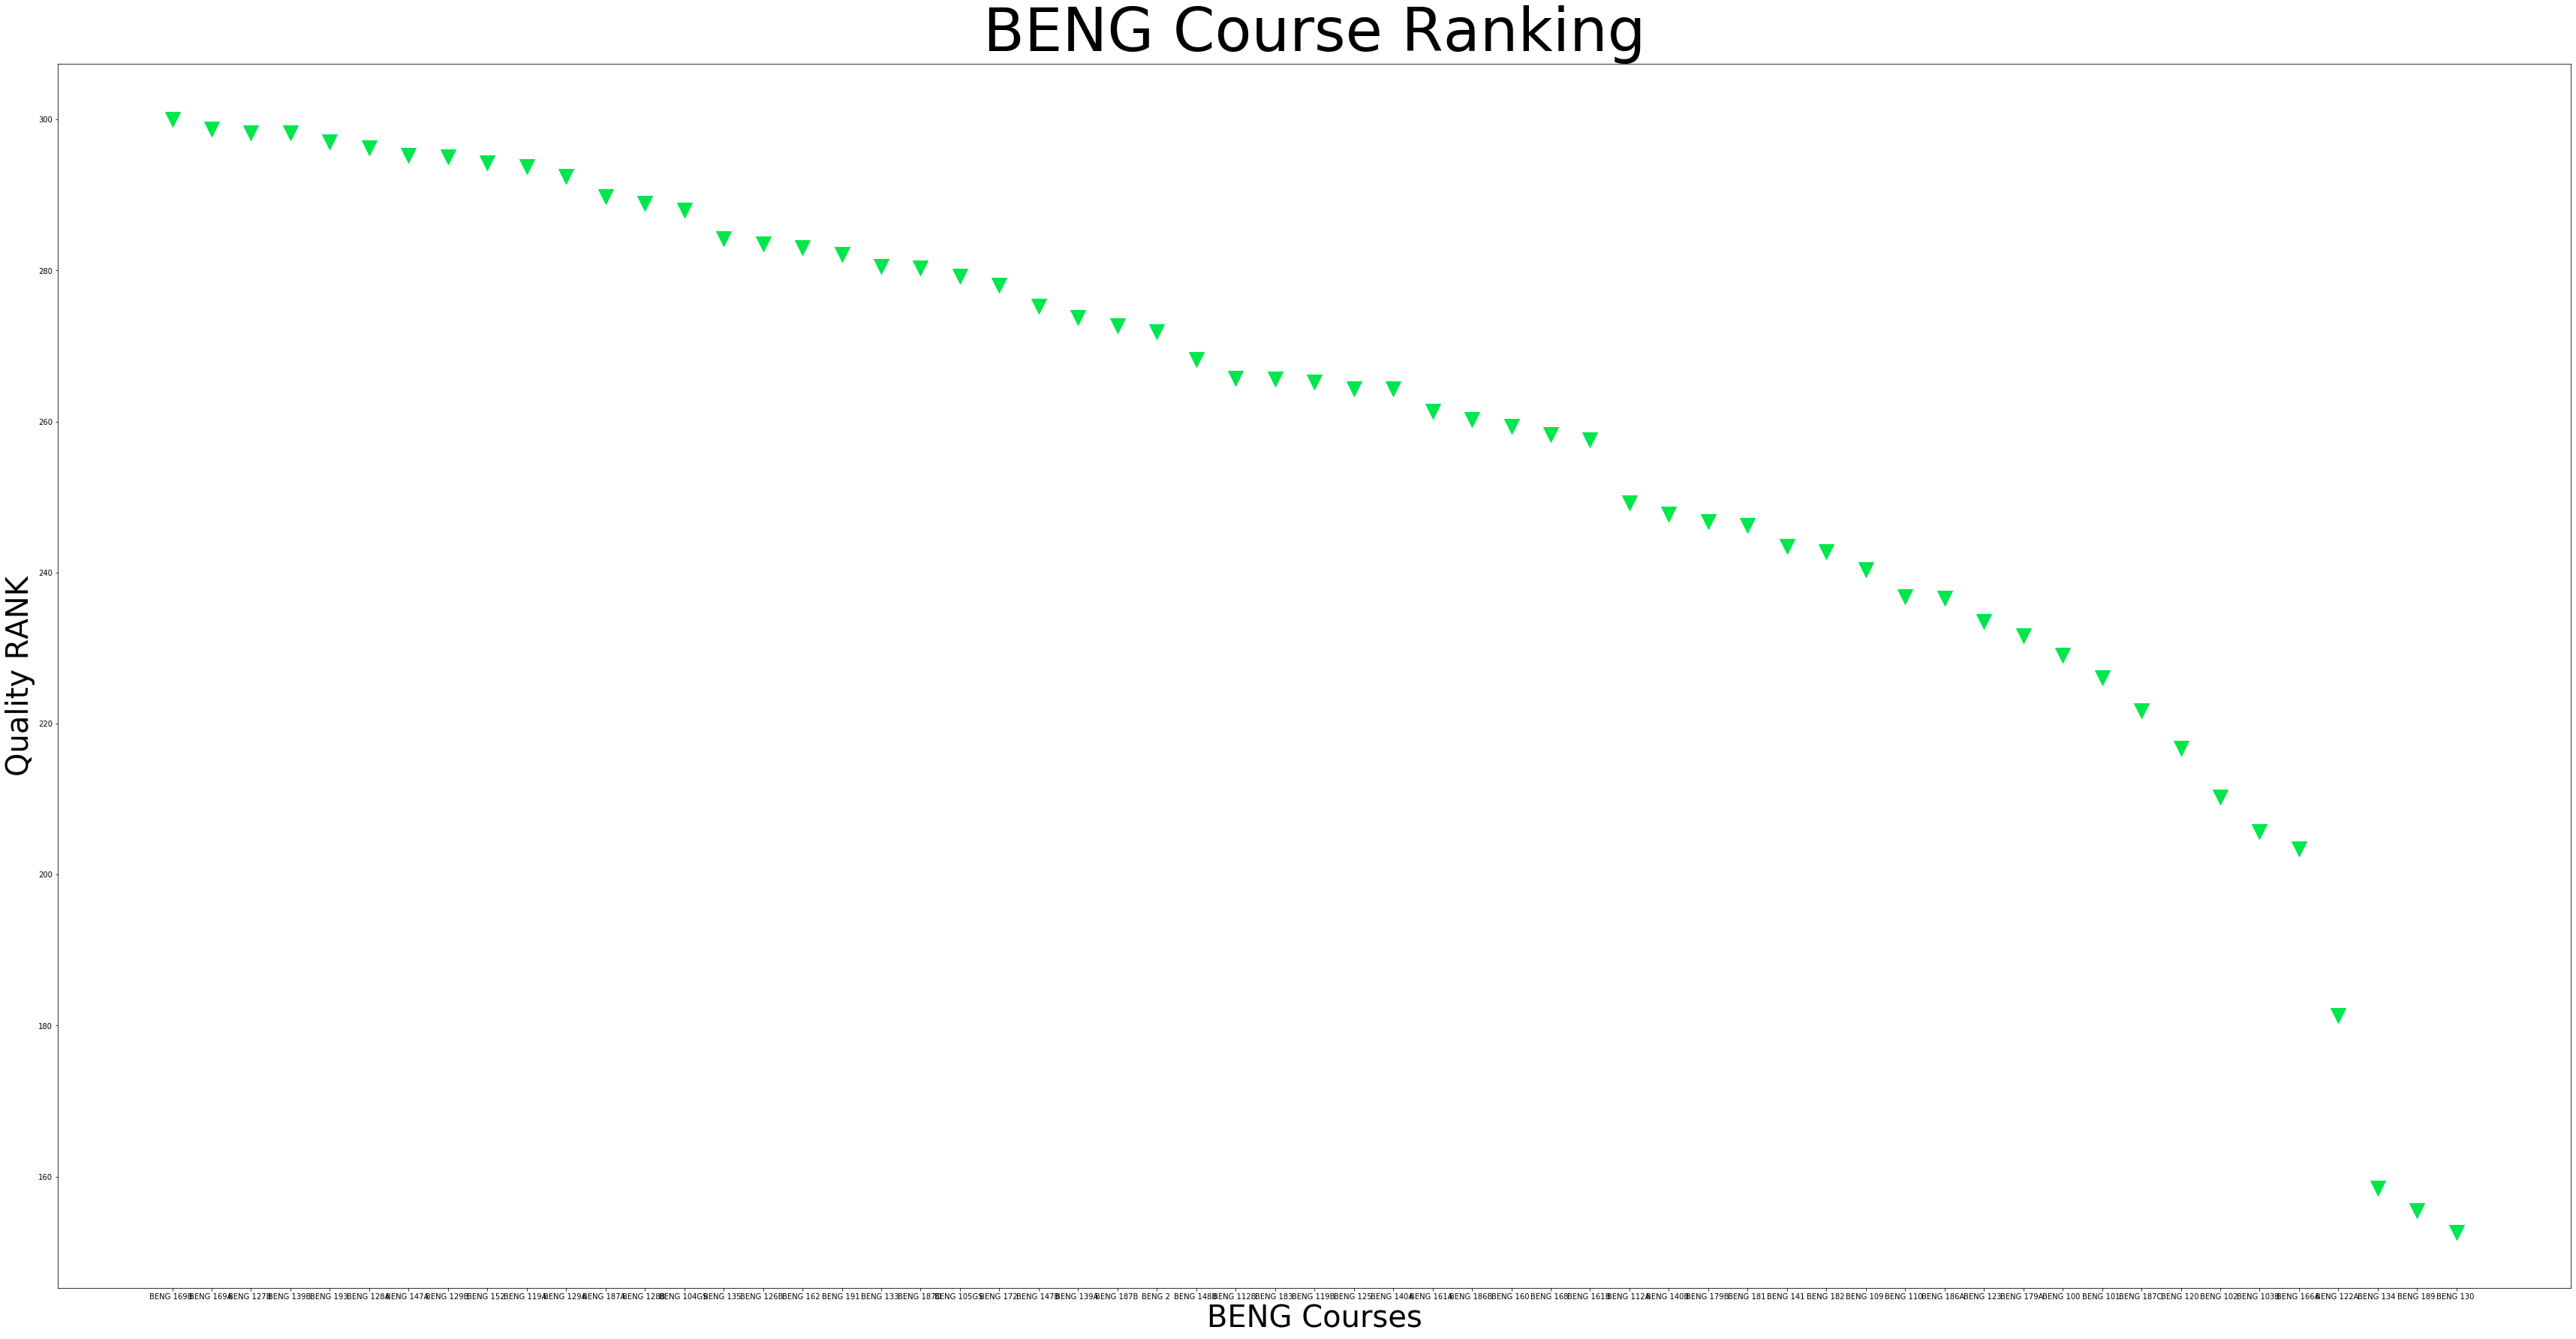

In [150]:
fig = plt.figure(figsize=(60, 30))
beng_x = fig.add_subplot(111)
beng_x = beng_courses_with_highest_evaluations_df["Course Number"]
beng_y = beng_courses_with_highest_evaluations_df["final sum"]
colors = (0,0.9,0.3)
plt.scatter(beng_x, beng_y, s=400, c=colors, marker="v", alpha=1)
plt.autoscale(enable=True, axis='x', tight=False)
plt.title('BENG Course Ranking', fontsize=80)
plt.xlabel('BENG Courses', fontsize=40)
plt.ylabel('Quality RANK', fontsize=40)
plt.savefig('Question1_BENG.jpg')
plt.show()

## Question 2

In [246]:
import pandas as pd 
import numpy as np 

#import the combined dataframe
combined_df = pd.read_csv("Preprocess_Completed.csv")
combined_df.set_index(["Department"], inplace=True)

#seperate the dataframes based on the departments
ece_df = combined_df.loc["ECE"]
cse_df = combined_df.loc["CSE"]
mae_df = combined_df.loc["MAE"]
beng_df = combined_df.loc["BENG"]

#reset the index for all the combined dataframes
ece_df.reset_index(inplace=True)
cse_df.reset_index(inplace=True)
mae_df.reset_index(inplace=True)
beng_df.reset_index(inplace=True)

#create new column to hold all the grades expected to grades received ratio for eachd department
ece_df["Final Grade Ratio"] = ece_df["Avg Grade Received"]/ece_df["Avg Grade Expected"]
cse_df["Final Grade Ratio"] = cse_df["Avg Grade Received"]/cse_df["Avg Grade Expected"]
mae_df["Final Grade Ratio"] = mae_df["Avg Grade Received"]/mae_df["Avg Grade Expected"]
beng_df["Final Grade Ratio"] = beng_df["Avg Grade Received"]/beng_df["Avg Grade Expected"]

#cerate groups based on the unique course numbers
ece_course_group = ece_df.groupby(["Course Number"])
cse_course_group = cse_df.groupby(["Course Number"])
mae_course_group = mae_df.groupby(["Course Number"])
beng_course_group = beng_df.groupby(["Course Number"])

#create new dataframes with same columns to store the averaged out results for each group
averged_out_ece_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_cse_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_mae_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_beng_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])

#create dictionaries and lists to hold the results for avergae values for each department
#for ece
average_enrolled_ece_dict = {}
average_grade_expected_ece_dict = {}
average_grade_receieved_ece_dict = {}
average_hours_studied_ece_dict = {}
ece_course_name = []
ece_total_enrolled = []

#for cse
average_enrolled_cse_dict = {}
average_grade_expected_cse_dict = {}
average_grade_receieved_cse_dict = {}
average_hours_studied_cse_dict = {}
cse_course_name = []
cse_total_enrolled = []

#for mae
average_enrolled_mae_dict = {}
average_grade_expected_mae_dict = {}
average_grade_receieved_mae_dict = {}
average_hours_studied_mae_dict = {}
mae_course_name = []
mae_total_enrolled = []

#for beng
average_enrolled_beng_dict = {}
average_grade_expected_beng_dict = {}
average_grade_receieved_beng_dict = {}
average_hours_studied_beng_dict = {}
beng_course_name = []
beng_total_enrolled = []


#get the averge for each column in each group - This will give us an averaged out column for hours studied,
# grades receieved and expected and total entrolled students for each unique course in the dataset
#for ece
for course, data in ece_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_ece_dict[course] = total_enrolled_val
    average_grade_receieved_ece_dict[course] = average_grade_per_course_receieved
    average_grade_expected_ece_dict[course] = average_grade_per_course_expected
    average_hours_studied_ece_dict[course] = average_hours_studied 

ece_course_name = average_enrolled_ece_dict.keys()
ece_total_enrolled = average_enrolled_ece_dict.values()
ece_average_grade_expected = average_grade_expected_ece_dict.values()
ece_average_grade_receieved = average_grade_receieved_ece_dict.values()
ece_average_hours_studied = average_hours_studied_ece_dict.values()

averged_out_ece_unique_course_df["Course"] = ece_course_name
averged_out_ece_unique_course_df["Total Enrolled"] = ece_total_enrolled
averged_out_ece_unique_course_df["Avrg Grade Expected"] = ece_average_grade_expected
averged_out_ece_unique_course_df["Avrg Grade Received"] = ece_average_grade_receieved
averged_out_ece_unique_course_df["Average Hours Studied"] = ece_average_hours_studied

#for cse
for course, data in cse_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_cse_dict[course] = total_enrolled_val
    average_grade_receieved_cse_dict[course] = average_grade_per_course_receieved
    average_grade_expected_cse_dict[course] = average_grade_per_course_expected
    average_hours_studied_cse_dict[course] = average_hours_studied 

cse_course_name = average_enrolled_cse_dict.keys()
cse_total_enrolled = average_enrolled_cse_dict.values()
cse_average_grade_expected = average_grade_expected_cse_dict.values()
cse_average_grade_receieved = average_grade_receieved_cse_dict.values()
cse_average_hours_studied = average_hours_studied_cse_dict.values()

averged_out_cse_unique_course_df["Course"] = cse_course_name
averged_out_cse_unique_course_df["Total Enrolled"] = cse_total_enrolled
averged_out_cse_unique_course_df["Avrg Grade Expected"] = cse_average_grade_expected
averged_out_cse_unique_course_df["Avrg Grade Received"] = cse_average_grade_receieved
averged_out_cse_unique_course_df["Average Hours Studied"] = cse_average_hours_studied

#for mae
for course, data in mae_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_mae_dict[course] = total_enrolled_val
    average_grade_receieved_mae_dict[course] = average_grade_per_course_receieved
    average_grade_expected_mae_dict[course] = average_grade_per_course_expected
    average_hours_studied_mae_dict[course] = average_hours_studied 

mae_course_name = average_enrolled_mae_dict.keys()
mae_total_enrolled = average_enrolled_mae_dict.values()
mae_average_grade_expected = average_grade_expected_mae_dict.values()
mae_average_grade_receieved = average_grade_receieved_mae_dict.values()
mae_average_hours_studied = average_hours_studied_mae_dict.values()

averged_out_mae_unique_course_df["Course"] = mae_course_name
averged_out_mae_unique_course_df["Total Enrolled"] = mae_total_enrolled
averged_out_mae_unique_course_df["Avrg Grade Expected"] = mae_average_grade_expected
averged_out_mae_unique_course_df["Avrg Grade Received"] = mae_average_grade_receieved
averged_out_mae_unique_course_df["Average Hours Studied"] = mae_average_hours_studied

#for beng
for course, data in beng_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_beng_dict[course] = total_enrolled_val
    average_grade_receieved_beng_dict[course] = average_grade_per_course_receieved
    average_grade_expected_beng_dict[course] = average_grade_per_course_expected
    average_hours_studied_beng_dict[course] = average_hours_studied 

beng_course_name = average_enrolled_beng_dict.keys()
beng_total_enrolled = average_enrolled_beng_dict.values()
beng_average_grade_expected = average_grade_expected_beng_dict.values()
beng_average_grade_receieved = average_grade_receieved_beng_dict.values()
beng_average_hours_studied = average_hours_studied_beng_dict.values()

averged_out_beng_unique_course_df["Course"] = beng_course_name
averged_out_beng_unique_course_df["Total Enrolled"] = beng_total_enrolled
averged_out_beng_unique_course_df["Avrg Grade Expected"] = beng_average_grade_expected
averged_out_beng_unique_course_df["Avrg Grade Received"] = beng_average_grade_receieved
averged_out_beng_unique_course_df["Average Hours Studied"] = beng_average_hours_studied


#divide the averged out grades received by grades expected; this will give us a good frame of reference to see consistency of the grades
averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_ece_unique_course_df["Avrg Grade Received"]/averged_out_ece_unique_course_df["Avrg Grade Expected"] 
averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_cse_unique_course_df["Avrg Grade Received"]/averged_out_cse_unique_course_df["Avrg Grade Expected"] 
averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_mae_unique_course_df["Avrg Grade Received"]/averged_out_mae_unique_course_df["Avrg Grade Expected"] 
averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_beng_unique_course_df["Avrg Grade Received"]/averged_out_beng_unique_course_df["Avrg Grade Expected"] 

#find mean and vairance for the ratio column to extract the most consistent grades overall
#ece
ece_mean_grade_ratio_val = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
ece_var_grade_ratio_val = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"].std()
ece_consistancy_upper_range = ece_mean_grade_ratio_val + ece_var_grade_ratio_val
ece_consistancy_lower_range = ece_mean_grade_ratio_val - ece_var_grade_ratio_val
consistency_range_mask_ece = (averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] < ece_consistancy_upper_range) & (averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] > ece_consistancy_lower_range )
lower_than_consistancy_mask_ece = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] < ece_consistancy_lower_range
higher_than_consistancy_mask_ece = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] > ece_consistancy_upper_range
most_consistant_ece_course_df = averged_out_ece_unique_course_df[consistency_range_mask_ece]
least_consistant_low_grade_df = averged_out_ece_unique_course_df[lower_than_consistancy_mask_ece]
least_consistant_high_grade_df = averged_out_ece_unique_course_df[higher_than_consistancy_mask_ece]
ece_course_percentage_goal_consistancy_percentage = (len(most_consistant_ece_course_df) / len(averged_out_ece_unique_course_df)) *100
ece_course_percentage_low_consistancy_percentage = (len(least_consistant_low_grade_df) / len(averged_out_ece_unique_course_df)) *100
ece_course_percentage_high_consistancy_percentage = (len(least_consistant_high_grade_df) / len(averged_out_ece_unique_course_df)) *100

#cse
cse_mean_grade_ratio_val = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
cse_var_grade_ratio_val = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"].std()
cse_consistancy_upper_range = cse_mean_grade_ratio_val + cse_var_grade_ratio_val
cse_consistancy_lower_range = cse_mean_grade_ratio_val - cse_var_grade_ratio_val
consistency_range_mask_cse = (averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] < cse_consistancy_upper_range) & (averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] > cse_consistancy_lower_range )
lower_than_consistancy_mask_cse = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] < cse_consistancy_lower_range
higher_than_consistancy_mask_cse = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] > cse_consistancy_upper_range
most_consistant_ece_course_df_cse = averged_out_cse_unique_course_df[consistency_range_mask_cse]
least_consistant_low_grade_df_cse = averged_out_cse_unique_course_df[lower_than_consistancy_mask_cse]
least_consistant_high_grade_df_cse = averged_out_cse_unique_course_df[higher_than_consistancy_mask_cse]
cse_course_percentage_goal_consistancy_percentage = (len(most_consistant_ece_course_df_cse) / len(averged_out_cse_unique_course_df)) *100
cse_course_percentage_low_consistancy_percentage = (len(least_consistant_low_grade_df_cse) / len(averged_out_cse_unique_course_df)) *100
cse_course_percentage_high_consistancy_percentage = (len(least_consistant_high_grade_df_cse) / len(averged_out_cse_unique_course_df)) *100

# mae
mae_mean_grade_ratio_val = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
mae_var_grade_ratio_val = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"].std()
mae_consistancy_upper_range = mae_mean_grade_ratio_val + mae_var_grade_ratio_val
mae_consistancy_lower_range = mae_mean_grade_ratio_val - mae_var_grade_ratio_val
consistency_range_mask_mae = (averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] < mae_consistancy_upper_range) & (averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] > mae_consistancy_lower_range )
lower_than_consistancy_mask_mae = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] < mae_consistancy_lower_range
higher_than_consistancy_mask_mae = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] > mae_consistancy_upper_range
most_consistant_ece_course_df_mae = averged_out_mae_unique_course_df[consistency_range_mask_mae]
least_consistant_low_grade_df_mae = averged_out_mae_unique_course_df[lower_than_consistancy_mask_mae]
least_consistant_high_grade_df_mae = averged_out_mae_unique_course_df[higher_than_consistancy_mask_mae]
mae_course_percentage_goal_consistancy_percentage = (len(most_consistant_ece_course_df_mae) / len(averged_out_mae_unique_course_df)) *100
mae_course_percentage_low_consistancy_percentage = (len(least_consistant_low_grade_df_mae) / len(averged_out_mae_unique_course_df)) *100
mae_course_percentage_high_consistancy_percentage = (len(least_consistant_high_grade_df_mae) / len(averged_out_mae_unique_course_df)) *100

#beng
beng_mean_grade_ratio_val = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
beng_var_grade_ratio_val = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"].std()
beng_consistancy_upper_range = beng_mean_grade_ratio_val + beng_var_grade_ratio_val
beng_consistancy_lower_range = beng_mean_grade_ratio_val - beng_var_grade_ratio_val
consistency_range_mask_beng = (averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] < beng_consistancy_upper_range) & (averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] > beng_consistancy_lower_range )
lower_than_consistancy_mask_beng = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] < beng_consistancy_lower_range
higher_than_consistancy_mask_beng = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] > beng_consistancy_upper_range
most_consistant_ece_course_df_beng = averged_out_beng_unique_course_df[consistency_range_mask_beng]
least_consistant_low_grade_df_beng = averged_out_beng_unique_course_df[lower_than_consistancy_mask_beng]
least_consistant_high_grade_df_beng = averged_out_beng_unique_course_df[higher_than_consistancy_mask_beng]
beng_course_percentage_goal_consistancy_percentage = (len(most_consistant_ece_course_df_beng) / len(averged_out_beng_unique_course_df)) *100
beng_course_percentage_low_consistancy_percentage = (len(least_consistant_low_grade_df_beng) / len(averged_out_beng_unique_course_df)) *100
beng_course_percentage_high_consistancy_percentage = (len(least_consistant_high_grade_df_beng) / len(averged_out_beng_unique_course_df)) *100


C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [251]:
averged_out_cse_unique_course_df

,Course,Total Enrolled,Average Hours Studied,Avrg Grade Expected,Avrg Grade Received,Grade Received/Grade Expected Ratio
0,CSE 100,9423,11.036250,3.262404,2.924808,0.896519
1,CSE 101,7844,8.599881,3.153571,3.042679,0.964836
2,CSE 103,1701,6.155500,3.290000,3.342000,1.015805
3,CSE 105,6838,7.911707,3.079878,2.740000,0.889646
4,CSE 107,535,7.591667,2.874167,3.014167,1.048710
5,CSE 11,7267,10.481754,3.459415,3.057719,0.883883
6,CSE 110,6292,9.021875,3.458750,3.172750,0.917311
7,CSE 111,135,4.782500,3.495000,3.035000,0.868383
8,CSE 112,835,8.001250,3.423750,3.303750,0.964951
9,CSE 118,247,7.370000,3.711429,3.552857,0.957275


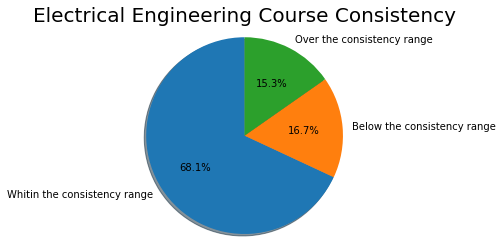

In [343]:
ece_pie_plot_sizes = [ece_course_percentage_goal_consistancy_percentage, ece_course_percentage_low_consistancy_percentage,ece_course_percentage_high_consistancy_percentage]
ece_pie_plot_labels = ['Whitin the consistency range', 'Below the consistency range', 'Over the consistency range']
fig1, ax1 = plt.subplots()
ax1.pie(ece_pie_plot_sizes, labels=ece_pie_plot_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Electrical Engineering Course Consistency', fontsize=20)
plt.savefig('Question2_ECE.jpg')
plt.show()

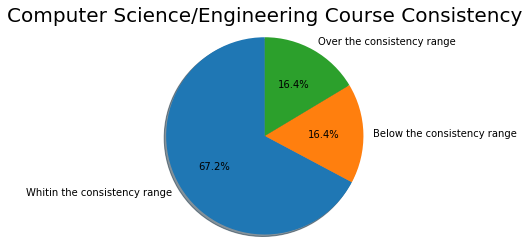

In [344]:
cse_pie_plot_sizes = [cse_course_percentage_goal_consistancy_percentage, cse_course_percentage_low_consistancy_percentage,cse_course_percentage_high_consistancy_percentage]
cse_pie_plot_labels = ['Whitin the consistency range', 'Below the consistency range', 'Over the consistency range']
fig1, ax1 = plt.subplots()
ax1.pie(cse_pie_plot_sizes, labels=cse_pie_plot_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Computer Science/Engineering Course Consistency', fontsize=20)
plt.savefig('Question2_CSE.jpg')
plt.show()

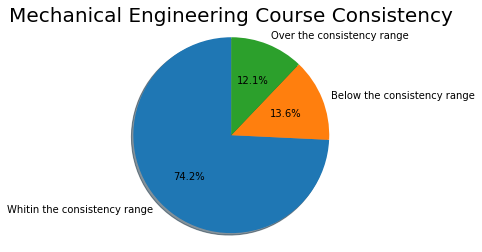

In [345]:
mae_pie_plot_sizes = [mae_course_percentage_goal_consistancy_percentage, mae_course_percentage_low_consistancy_percentage,mae_course_percentage_high_consistancy_percentage]
mae_pie_plot_labels = ['Whitin the consistency range', 'Below the consistency range', 'Over the consistency range']
fig1, ax1 = plt.subplots()
ax1.pie(mae_pie_plot_sizes, labels=mae_pie_plot_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mechanical Engineering Course Consistency', fontsize=20)
plt.savefig('Question2_MAE.jpg')
plt.show()

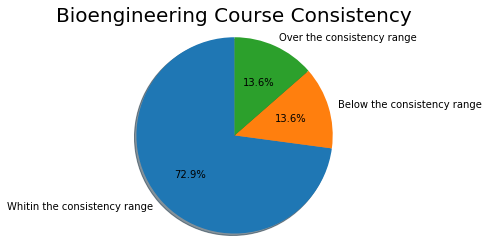

In [346]:
beng_pie_plot_sizes = [beng_course_percentage_goal_consistancy_percentage, beng_course_percentage_low_consistancy_percentage,beng_course_percentage_high_consistancy_percentage]
beng_pie_plot_labels = ['Whitin the consistency range', 'Below the consistency range', 'Over the consistency range']
fig1, ax1 = plt.subplots()
ax1.pie(beng_pie_plot_sizes, labels=beng_pie_plot_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Bioengineering Course Consistency', fontsize=20)
plt.savefig('Question2_BENG.jpg')
plt.show()


## Question 3

In [387]:
import pandas as pd 
import numpy as np 

#import the combined dataframe
combined_df = pd.read_csv("Preprocess_Completed.csv")
combined_df.set_index(["Department"], inplace=True)

#seperate the dataframes based on the departments
ece_df = combined_df.loc["ECE"]
cse_df = combined_df.loc["CSE"]
mae_df = combined_df.loc["MAE"]
beng_df = combined_df.loc["BENG"]

#reset the index for all the combined dataframes
ece_df.reset_index(inplace=True)
cse_df.reset_index(inplace=True)
mae_df.reset_index(inplace=True)
beng_df.reset_index(inplace=True)

#create new column to hold all the grades expected to grades received ratio for eachd department
ece_df["Final Grade Ratio"] = ece_df["Avg Grade Received"]/ece_df["Avg Grade Expected"]
cse_df["Final Grade Ratio"] = cse_df["Avg Grade Received"]/cse_df["Avg Grade Expected"]
mae_df["Final Grade Ratio"] = mae_df["Avg Grade Received"]/mae_df["Avg Grade Expected"]
beng_df["Final Grade Ratio"] = beng_df["Avg Grade Received"]/beng_df["Avg Grade Expected"]

#cerate groups based on the unique course numbers
ece_course_group = ece_df.groupby(["Course Number"])
cse_course_group = cse_df.groupby(["Course Number"])
mae_course_group = mae_df.groupby(["Course Number"])
beng_course_group = beng_df.groupby(["Course Number"])

#create new dataframes with same columns to store the averaged out results for each group
averged_out_ece_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_cse_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_mae_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])
averged_out_beng_unique_course_df = pd.DataFrame(columns =["Course", "Total Enrolled", "Average Hours Studied" , "Avrg Grade Expected", "Avrg Grade Received"])

#create dictionaries and lists to hold the results for avergae values for each department
#for ece
average_enrolled_ece_dict = {}
average_grade_expected_ece_dict = {}
average_grade_receieved_ece_dict = {}
average_hours_studied_ece_dict = {}
ece_course_name = []
ece_total_enrolled = []

#for cse
average_enrolled_cse_dict = {}
average_grade_expected_cse_dict = {}
average_grade_receieved_cse_dict = {}
average_hours_studied_cse_dict = {}
cse_course_name = []
cse_total_enrolled = []

#for mae
average_enrolled_mae_dict = {}
average_grade_expected_mae_dict = {}
average_grade_receieved_mae_dict = {}
average_hours_studied_mae_dict = {}
mae_course_name = []
mae_total_enrolled = []

#for beng
average_enrolled_beng_dict = {}
average_grade_expected_beng_dict = {}
average_grade_receieved_beng_dict = {}
average_hours_studied_beng_dict = {}
beng_course_name = []
beng_total_enrolled = []


#get the averge for each column in each group - This will give us an averaged out column for hours studied,
# grades receieved and expected and total entrolled students for each unique course in the dataset
#for ece
for course, data in ece_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_ece_dict[course] = total_enrolled_val
    average_grade_receieved_ece_dict[course] = average_grade_per_course_receieved
    average_grade_expected_ece_dict[course] = average_grade_per_course_expected
    average_hours_studied_ece_dict[course] = average_hours_studied 

ece_course_name = average_enrolled_ece_dict.keys()
ece_total_enrolled = average_enrolled_ece_dict.values()
ece_average_grade_expected = average_grade_expected_ece_dict.values()
ece_average_grade_receieved = average_grade_receieved_ece_dict.values()
ece_average_hours_studied = average_hours_studied_ece_dict.values()

averged_out_ece_unique_course_df["Course"] = ece_course_name
averged_out_ece_unique_course_df["Total Enrolled"] = ece_total_enrolled
averged_out_ece_unique_course_df["Avrg Grade Expected"] = ece_average_grade_expected
averged_out_ece_unique_course_df["Avrg Grade Received"] = ece_average_grade_receieved
averged_out_ece_unique_course_df["Average Hours Studied"] = ece_average_hours_studied

#for cse
for course, data in cse_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_cse_dict[course] = total_enrolled_val
    average_grade_receieved_cse_dict[course] = average_grade_per_course_receieved
    average_grade_expected_cse_dict[course] = average_grade_per_course_expected
    average_hours_studied_cse_dict[course] = average_hours_studied 

cse_course_name = average_enrolled_cse_dict.keys()
cse_total_enrolled = average_enrolled_cse_dict.values()
cse_average_grade_expected = average_grade_expected_cse_dict.values()
cse_average_grade_receieved = average_grade_receieved_cse_dict.values()
cse_average_hours_studied = average_hours_studied_cse_dict.values()

averged_out_cse_unique_course_df["Course"] = cse_course_name
averged_out_cse_unique_course_df["Total Enrolled"] = cse_total_enrolled
averged_out_cse_unique_course_df["Avrg Grade Expected"] = cse_average_grade_expected
averged_out_cse_unique_course_df["Avrg Grade Received"] = cse_average_grade_receieved
averged_out_cse_unique_course_df["Average Hours Studied"] = cse_average_hours_studied

#for mae
for course, data in mae_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_mae_dict[course] = total_enrolled_val
    average_grade_receieved_mae_dict[course] = average_grade_per_course_receieved
    average_grade_expected_mae_dict[course] = average_grade_per_course_expected
    average_hours_studied_mae_dict[course] = average_hours_studied 

mae_course_name = average_enrolled_mae_dict.keys()
mae_total_enrolled = average_enrolled_mae_dict.values()
mae_average_grade_expected = average_grade_expected_mae_dict.values()
mae_average_grade_receieved = average_grade_receieved_mae_dict.values()
mae_average_hours_studied = average_hours_studied_mae_dict.values()

averged_out_mae_unique_course_df["Course"] = mae_course_name
averged_out_mae_unique_course_df["Total Enrolled"] = mae_total_enrolled
averged_out_mae_unique_course_df["Avrg Grade Expected"] = mae_average_grade_expected
averged_out_mae_unique_course_df["Avrg Grade Received"] = mae_average_grade_receieved
averged_out_mae_unique_course_df["Average Hours Studied"] = mae_average_hours_studied

#for beng
for course, data in beng_course_group:
    total_enrolled_val = data["Enroll"].sum()
    average_grade_per_course_receieved = data["Avg Grade Received"].mean()
    average_grade_per_course_expected = data["Avg Grade Expected"].mean()
    average_hours_studied = data["Study Hrs/wk"].mean()
    average_enrolled_beng_dict[course] = total_enrolled_val
    average_grade_receieved_beng_dict[course] = average_grade_per_course_receieved
    average_grade_expected_beng_dict[course] = average_grade_per_course_expected
    average_hours_studied_beng_dict[course] = average_hours_studied 

beng_course_name = average_enrolled_beng_dict.keys()
beng_total_enrolled = average_enrolled_beng_dict.values()
beng_average_grade_expected = average_grade_expected_beng_dict.values()
beng_average_grade_receieved = average_grade_receieved_beng_dict.values()
beng_average_hours_studied = average_hours_studied_beng_dict.values()

averged_out_beng_unique_course_df["Course"] = beng_course_name
averged_out_beng_unique_course_df["Total Enrolled"] = beng_total_enrolled
averged_out_beng_unique_course_df["Avrg Grade Expected"] = beng_average_grade_expected
averged_out_beng_unique_course_df["Avrg Grade Received"] = beng_average_grade_receieved
averged_out_beng_unique_course_df["Average Hours Studied"] = beng_average_hours_studied


#divide the averged out grades received by grades expected; this will give us a good frame of reference to see consistency of the grades
averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_ece_unique_course_df["Avrg Grade Received"]/averged_out_ece_unique_course_df["Avrg Grade Expected"] 
averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_cse_unique_course_df["Avrg Grade Received"]/averged_out_cse_unique_course_df["Avrg Grade Expected"] 
averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_mae_unique_course_df["Avrg Grade Received"]/averged_out_mae_unique_course_df["Avrg Grade Expected"] 
averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] = averged_out_beng_unique_course_df["Avrg Grade Received"]/averged_out_beng_unique_course_df["Avrg Grade Expected"] 

#find mean and vairance for the ratio column to extract the most consistent grades overall
#ece
ece_mean_grade_ratio_val = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
ece_var_grade_ratio_val = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"].std()
ece_consistancy_upper_range = ece_mean_grade_ratio_val + ece_var_grade_ratio_val
ece_consistancy_lower_range = ece_mean_grade_ratio_val - ece_var_grade_ratio_val
ece_over_the_Range_mask = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] > ece_consistancy_upper_range
ece_below_the_range_mask = averged_out_ece_unique_course_df["Grade Received/Grade Expected Ratio"] < ece_consistancy_lower_range
ece_over_the_average_df = averged_out_ece_unique_course_df[ece_over_the_Range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending =False)
ece_below_the_average_df = averged_out_ece_unique_course_df[ece_below_the_range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending=False)


#cse
cse_mean_grade_ratio_val = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
cse_var_grade_ratio_val = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"].std()
cse_consistancy_upper_range = cse_mean_grade_ratio_val + cse_var_grade_ratio_val
cse_consistancy_lower_range = cse_mean_grade_ratio_val - cse_var_grade_ratio_val
consistency_range_mask_cse = (averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] > cse_consistancy_upper_range) & (averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] < cse_consistancy_lower_range )
cse_most_variant_courses_df = averged_out_cse_unique_course_df[consistency_range_mask_cse]
cse_over_the_Range_mask = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] > cse_consistancy_upper_range
cse_below_the_range_mask = averged_out_cse_unique_course_df["Grade Received/Grade Expected Ratio"] < cse_consistancy_lower_range
cse_over_the_average_df = averged_out_cse_unique_course_df[cse_over_the_Range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending =False)
cse_below_the_average_df = averged_out_cse_unique_course_df[cse_below_the_range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending=False)



# mae
mae_mean_grade_ratio_val = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
mae_var_grade_ratio_val = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"].std()
mae_consistancy_upper_range = mae_mean_grade_ratio_val + mae_var_grade_ratio_val
mae_consistancy_lower_range = mae_mean_grade_ratio_val - mae_var_grade_ratio_val
consistency_range_mask_mae = (averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] > mae_consistancy_upper_range) & (averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] < mae_consistancy_lower_range )
mae_most_variant_courses_df = averged_out_mae_unique_course_df[consistency_range_mask_mae]
mae_over_the_Range_mask = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] > mae_consistancy_upper_range
mae_below_the_range_mask = averged_out_mae_unique_course_df["Grade Received/Grade Expected Ratio"] < mae_consistancy_lower_range
mae_over_the_average_df = averged_out_mae_unique_course_df[mae_over_the_Range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending =False)
mae_below_the_average_df = averged_out_mae_unique_course_df[mae_below_the_range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending=False)




#beng
beng_mean_grade_ratio_val = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"].mean()
beng_var_grade_ratio_val = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"].std()
beng_consistancy_upper_range = beng_mean_grade_ratio_val + beng_var_grade_ratio_val
beng_consistancy_lower_range = beng_mean_grade_ratio_val - beng_var_grade_ratio_val
consistency_range_mask_beng = (averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] > beng_consistancy_upper_range) & (averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] < beng_consistancy_lower_range )
beng_most_variant_courses_df = averged_out_beng_unique_course_df[consistency_range_mask_beng]
beng_over_the_Range_mask = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] > beng_consistancy_upper_range
beng_below_the_range_mask = averged_out_beng_unique_course_df["Grade Received/Grade Expected Ratio"] < beng_consistancy_lower_range
beng_over_the_average_df = averged_out_beng_unique_course_df[beng_over_the_Range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending =False)
beng_below_the_average_df = averged_out_beng_unique_course_df[beng_below_the_range_mask].sort_values(by=["Grade Received/Grade Expected Ratio"], ascending=False)



C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TKAFEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [388]:
ece_over_the_average_df.reset_index(inplace=True)
ece_below_the_average_df.reset_index(inplace=True)
top5_ece_df = pd.DataFrame()
last5_ece_df = pd.DataFrame()
a = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
b = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
top5_ece_df = top5_ece_df.append(a)
last5_ece_df = last5_ece_df.append(b)
top5_ece_df

,index,Course,Total Enrolled,Average Hours Studied,Avrg Grade Expected,Avrg Grade Received,Grade Received/Grade Expected Ratio
0,68,ECE 53A,37,5.300000,3.080000,3.410000,1.107143
1,36,ECE 158B,43,7.270000,3.580000,3.840000,1.072626
2,26,ECE 144,52,13.690000,3.520000,3.660000,1.039773
3,38,ECE 16,159,9.318571,3.368571,3.494286,1.037320
4,22,ECE 140B,142,9.310000,3.530000,3.610000,1.022663


ValueError: shape mismatch: objects cannot be broadcast to a single shape

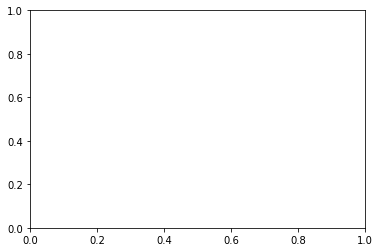

In [390]:
ece_y = list(top5_ece_df["Grade Received/Grade Expected Ratio"])
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
plt.bar(y_pos, ece_y)


In [ ]:
cse_over_the_average_df.reset_index(inplace=True)
cse_below_the_average_df.reset_index(inplace=True)
top5_cse_df = pd.DataFrame()
last5_cse_df = pd.DataFrame()
c = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
d = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
top5_cse_df = top5_cse_df.append(a)
last5_cse_df = last5_cse_df.append(b)


In [372]:
mae_over_the_average_df.reset_index(inplace=True)
mae_below_the_average_df.reset_index(inplace=True)
top5_mae_df = pd.DataFrame()
last5_mae_df = pd.DataFrame()
e = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
f = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
top5_mae_df = top5_mae_df.append(a)
last5_mae_df = last5_mae_df.append(b)

In [373]:
beng_over_the_average_df.reset_index(inplace=True)
beng_below_the_average_df.reset_index(inplace=True)
top5_beng_df = pd.DataFrame()
last5_beng_df = pd.DataFrame()
g = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
j = ece_over_the_average_df.nlargest(5, "Grade Received/Grade Expected Ratio")
top5_beng_df = top5_beng_df.append(a)
last5_beng_df = last5_beng_df.append(b)